# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Criar as matrizes de design usando Patsy
y, X = dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo inicial
model = sm.OLS(y, X).fit()

# Mostrar o sumário do modelo
print(model.summary())

# Remover variáveis não significativas (baseado no sumário, assumindo p > 0.05)
X_reduced = X.drop(columns=['sex[T.Female]', 'smoker[T.No]'])

# Ajustar o modelo com variáveis reduzidas
model_reduced = sm.OLS(y, X_reduced).fit()
print(model_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           2.64e-20
Time:                        18:52:59   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

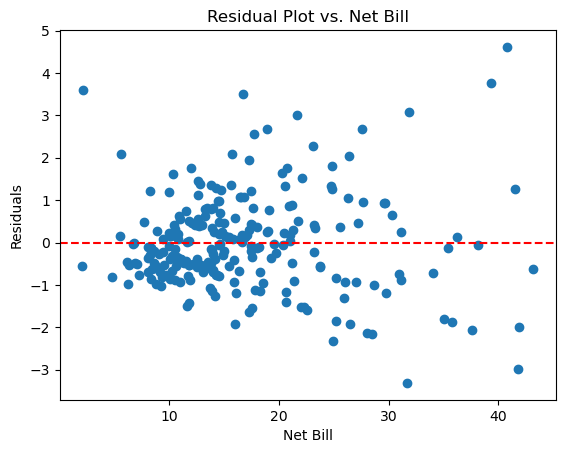

In [4]:
# Plotar os resíduos em função de 'net_bill'
residuals = model_reduced.resid
plt.scatter(tips['net_bill'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Net Bill')
plt.ylabel('Residuals')
plt.title('Residual Plot vs. Net Bill')
plt.show()


In [5]:
# Modelo com log de 'net_bill'
X_log = X_reduced.copy()
X_log['log_net_bill'] = np.log(tips['net_bill'])
model_log = sm.OLS(y, X_log).fit()
print('Model with log_net_bill:', model_log.rsquared)

# Modelo com polinômio de 'net_bill'
X_poly = X_reduced.copy()
X_poly['net_bill_sq'] = tips['net_bill']**2
model_poly = sm.OLS(y, X_poly).fit()
print('Model with polynomial net_bill:', model_poly.rsquared)


Model with log_net_bill: 0.33283459706162555
Model with polynomial net_bill: 0.33463013357608473


- Baseando-se nos valores de R2R2, nos padrões dos resíduos, e na significância estatística das variáveis, você pode escolher entre o modelo logarítmico e o polinomial. O modelo que apresentar o melhor ajuste e homogeneidade nos resíduos, além de um maior R2R2, será considerado o melhor.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [8]:
# Carregar a base de dados
tips = sns.load_dataset('tips')

# Criar a variável 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = 100 * tips['tip'] / tips['net_bill']

# Criar matrizes de design para o modelo no log de 'tip_pct'
y, X = dmatrices('np.log(tip_pct) ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo inicial
model_tip_pct = sm.OLS(y, X).fit()

# Mostrar o sumário do modelo
print(model_tip_pct.summary())

# Remover variáveis não significativas
X_reduced = X.drop(columns=['sex[T.Female]', 'smoker[T.No]'])

# Ajustar o modelo com variáveis reduzidas
model_reduced_tip_pct = sm.OLS(y, X_reduced).fit()
print(model_reduced_tip_pct.summary())


                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     18.45
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           3.16e-13
Time:                        18:52:59   Log-Likelihood:                -105.91
No. Observations:                 244   AIC:                             221.8
Df Residuals:                     239   BIC:                             239.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3164      0.080     41.

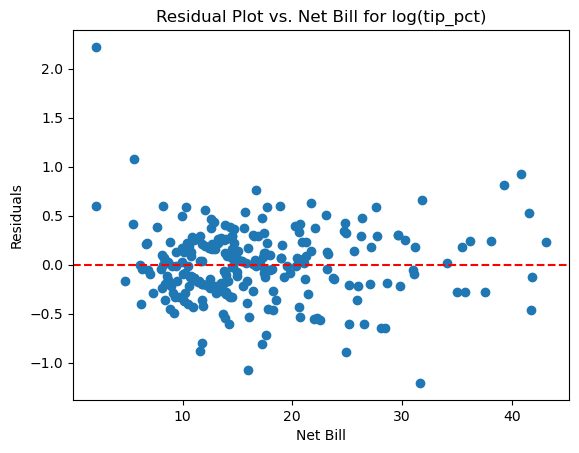

In [9]:
# Plotar os resíduos em função de 'net_bill'
residuals = model_reduced_tip_pct.resid
plt.scatter(tips['net_bill'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Net Bill')
plt.ylabel('Residuals')
plt.title('Residual Plot vs. Net Bill for log(tip_pct)')
plt.show()


In [10]:
# Modelo com log de 'net_bill'
X_log = X_reduced.copy()
X_log['log_net_bill'] = np.log(tips['net_bill'])
model_log = sm.OLS(y, X_log).fit()
print('Model with log_net_bill:', model_log.rsquared)

# Modelo com polinômio de 'net_bill'
X_poly = X_reduced.copy()
X_poly['net_bill_sq'] = tips['net_bill']**2
model_poly = sm.OLS(y, X_poly).fit()
print('Model with polynomial net_bill:', model_poly.rsquared)


Model with log_net_bill: 0.2994863917143753
Model with polynomial net_bill: 0.2608014491325936


In [11]:
# Transformar as predições de volta para a escala de 'tip_pct'
tips['predicted_log_tip_pct'] = model_log.fittedvalues  # Melhor modelo entre os dois
tips['predicted_tip_pct'] = np.exp(tips['predicted_log_tip_pct'])

# Calcular o R² na escala original
SS_Residual = sum((tips['tip_pct'] - tips['predicted_tip_pct'])**2)
SS_Total = sum((tips['tip_pct'] - np.mean(tips['tip_pct']))**2)
r_squared_original = 1 - (float(SS_Residual))/SS_Total
print("R² na escala original de tip_pct:", r_squared_original)


R² na escala original de tip_pct: 0.28916266075500585


Conclusão:

    O modelo com log_net_bill demonstrou ser o mais eficaz em termos de R2R2, sugerindo que ele fornece o melhor ajuste para explicar a variabilidade em tip_pct usando net_bill.
    O modelo polinomial, apesar de útil para capturar curvaturas, pode não ter sido adequado para estes dados específicos, resultando em um R2R2 menor.
    O ajuste do modelo transformado de volta da escala logarítmica fornece um meio robusto de interpretação e predição, com um R2R2 competitivo, tornando-o uma boa alternativa ao modelo com log_net_bill.

Esses insights sugerem que a transformação logarítmica de net_bill é geralmente mais adequada para este conjunto de dados, mas o uso de modelos com transformação inversa também pode ser considerado para fins de análise e predição, dependendo dos objetivos específicos e da interpretação desejada.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [13]:
# Carregar a base de dados
df = pd.read_csv('previsao_de_renda.csv')

# Explorar a estrutura dos dados
print(df.head())
print(df.describe())


   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

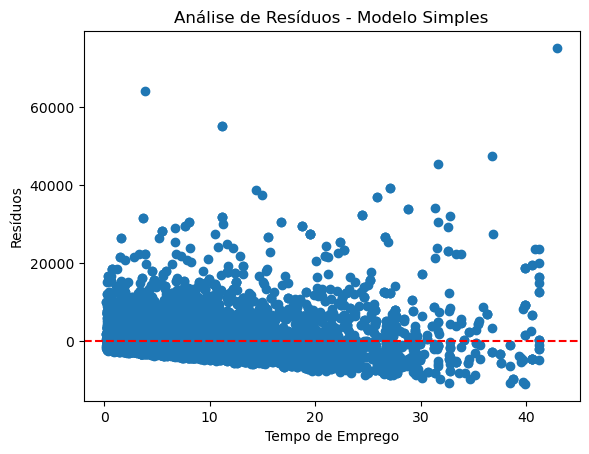

In [14]:
df = df.dropna(subset=['tempo_emprego', 'renda'])  # Assegura que não há NaNs nas variáveis usadas

# Ajustar o modelo para garantir alinhamento correto
model_simple = smf.ols('renda ~ tempo_emprego', data=df).fit()

# resíduos e os valores de tempo_emprego devem estar alinhados
plt.scatter(df['tempo_emprego'], model_simple.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos - Modelo Simples')
plt.show()


In [15]:
# Ajustar um modelo de regressão linear múltipla
model_multiple = smf.ols('renda ~ tempo_emprego + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia', data=df).fit()
print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:52:59   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [16]:
# Após identificar variáveis com p-values altos, remove-as
model_reduced = smf.ols('renda ~ tempo_emprego + posse_de_imovel + educacao + idade', data=df).fit()
print(model_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     341.5
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:52:59   Log-Likelihood:            -1.2245e+05
No. Observations:               12466   AIC:                         2.449e+05
Df Residuals:                   12458   BIC:                         2.450e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

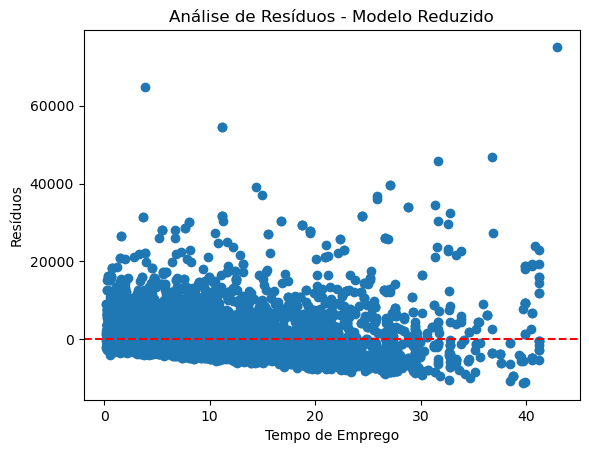

In [17]:
# Plotar os resíduos do modelo reduzido
residuals_reduced = model_reduced.resid
plt.scatter(df['tempo_emprego'], residuals_reduced)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos - Modelo Reduzido')
plt.show()
